NATURE MEDICINE Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pylab as plt
from IPython.display import set_matplotlib_formats

%matplotlib inline


In [2]:
data = pd.read_csv("Nature_GlobalAttitude towards vaccine.csv", encoding = "ISO-8859-1")
listOfCountries = (["Brazil", "Canada", "China", "Ecuador", "France", 
                   "Germany", "India", "Italy", "Mexico", "Nigeria", 
                   "Poland", "Russia", "South Africa", "South Korea", 
                   "Singapore", "Spain", "Sweden", "UK", "USA"])

In [3]:
def getCountryInfo(countryID):
    return data[data["Country"]==countryID]

def getCountryName(countryID):
    return listOfCountries[countryID]

def getMeanAgreement(countryID):
    countryData = getCountryInfo(countryID)
    return np.sum(countryData["Vaccine"]>3) / len(countryData["Vaccine"]) * 100

In [4]:
uk_data=getCountryInfo(18)

In [5]:
customData = pd.DataFrame()
selectedCountries = pd.unique(data["Country"])
for countryID in selectedCountries:
    customData = customData.append({
        "Percentage of people who are very or somewhat likely to accept": getMeanAgreement(countryID),
        'CountryID': countryID,
        'Country name': getCountryName(countryID-1)
    }, ignore_index=True)

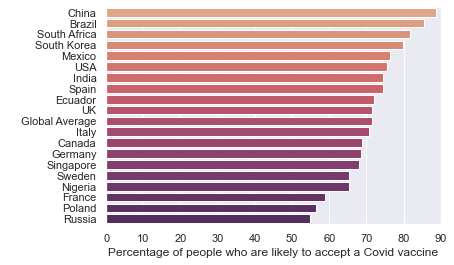

In [10]:
global_avg = np.sum(customData["Percentage of people who are very or somewhat likely to accept" \
                                ])/len(customData["Percentage of people who are very or somewhat likely to accept"])
                                

customData = customData.append({
        'Percentage of people who are very or somewhat likely to accept': global_avg,
        'CountryID': 20,
        'Country name': "Global Average"
    }, ignore_index=True)
plot_title = "How does Vaccine Hesitancy in the UK compare to other countries?"
sns.set_style("whitegrid")
sns.set_theme(font="Arial")

plt.tight_layout()
#plt.title(plot_title)
plt.xlim([0,90])

customData = customData.sort_values(by="Percentage of people \
who are very or somewhat likely to accept", ascending=False)
bar = sns.barplot(data=customData, y="Country name", \
                  x="Percentage of people who are very or somewhat likely to accept", \
                  palette='flare')
bar.set(xlabel='Percentage of people who are likely to accept a Covid vaccine', ylabel=' ')
plt.savefig('UkVsWorld.svg', format='svg')
plt.show()
